In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA CLEANING AND UNDWESTANDING

In [3]:
df= pd.read_csv("SampleSuperstore.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.drop(columns="Postal Code",inplace=True)

In [6]:
df.duplicated().sum()

50

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [8]:
df.drop_duplicates(inplace= True)

In [9]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df['Profit Margin %'] = (df.Profit/df.Sales)*100
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [11]:
df.nunique()

Ship Mode             4
Segment               3
Country               1
City                531
State                49
Region                4
Category              3
Sub-Category         17
Sales              5825
Quantity             14
Discount             12
Profit             7287
Profit Margin %     525
dtype: int64

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,Quantity,Discount,Profit,Profit Margin %
Sales,1.000000,0.200469,-0.028625,0.479078,0.004030
Quantity,0.200469,1.000000,0.008307,0.066089,-0.004710
Discount,-0.028625,0.008307,1.000000,-0.219939,-0.864355
Profit,0.479078,0.066089,-0.219939,1.000000,0.224351
Profit Margin %,0.004030,-0.004710,-0.864355,0.224351,1.000000


In [13]:
print(df["Ship Mode"].unique())


['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [14]:
print(df["Segment"].unique())

['Consumer' 'Corporate' 'Home Office']


In [15]:
print(df["Country"].unique())

['United States']


In [16]:
print(df["Region"].unique())

['South' 'West' 'Central' 'East']


In [17]:
print(df["Category"].unique())

['Furniture' 'Office Supplies' 'Technology']


In [18]:
print(df["Sub-Category"].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [19]:
df.drop(columns="Country",inplace=True)

In [20]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [21]:
df.shape

(9944, 12)

## Statistical

In [22]:
df.describe(include = "all")

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9944,9944,9944,9944,9944,9944,9944,9944.000000,9944.000000,9944.000000,9944.000000,9944.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5930,5160,906,1980,3177,5986,1518,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.752150,3.794047,0.156440,28.770873,11.959097
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624.644765,2.228752,0.206584,234.841370,46.676260
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.340000,2.000000,0.000000,1.724800,7.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,3.000000,0.200000,8.679950,27.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.104000,5.000000,0.200000,29.534700,36.250000


In [23]:
df.describe()

,Sales,Quantity,Discount,Profit,Profit Margin %
count,9944.000000,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873,11.959097
std,624.644765,2.228752,0.206584,234.841370,46.676260
min,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,17.340000,2.000000,0.000000,1.724800,7.500000
50%,55.000000,3.000000,0.200000,8.679950,27.000000
75%,210.104000,5.000000,0.200000,29.534700,36.250000
max,22638.480000,14.000000,0.800000,8399.976000,50.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Mode        9944 non-null   object 
 1   Segment          9944 non-null   object 
 2   City             9944 non-null   object 
 3   State            9944 non-null   object 
 4   Region           9944 non-null   object 
 5   Category         9944 non-null   object 
 6   Sub-Category     9944 non-null   object 
 7   Sales            9944 non-null   float64
 8   Quantity         9944 non-null   int64  
 9   Discount         9944 non-null   float64
 10  Profit           9944 non-null   float64
 11  Profit Margin %  9944 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1009.9+ KB


In [25]:
df.isna().sum()

Ship Mode          0
Segment            0
City               0
State              0
Region             0
Category           0
Sub-Category       0
Sales              0
Quantity           0
Discount           0
Profit             0
Profit Margin %    0
dtype: int64

In [26]:
round(sum(df['Sales']))

2294599

In [27]:
sum(df['Quantity'])

37728

## visualizations

<Axes: xlabel='Region'>

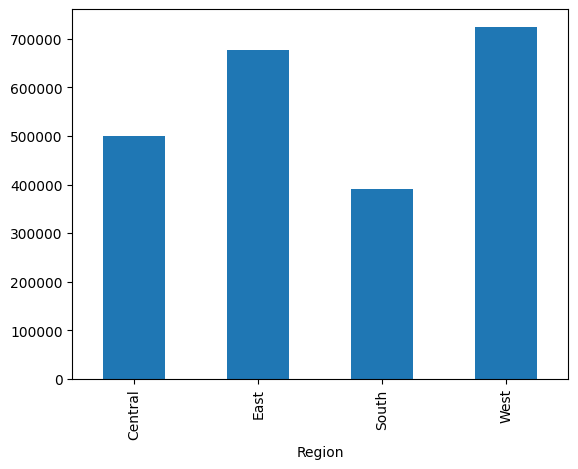

In [28]:
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: xlabel='Region'>

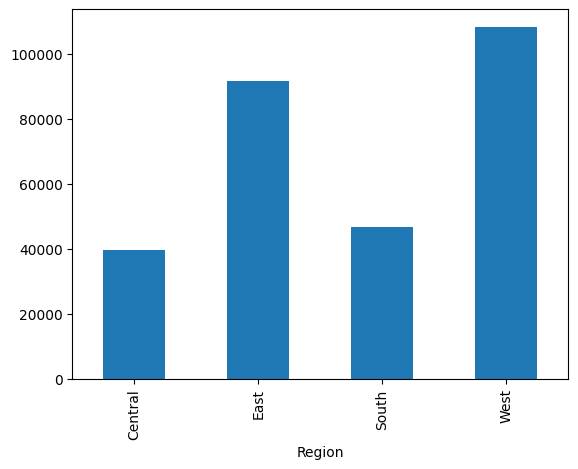

In [29]:
df.groupby("Region")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

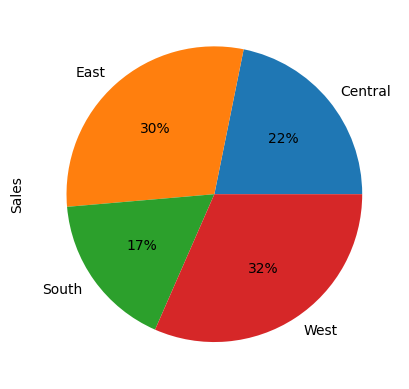

In [30]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

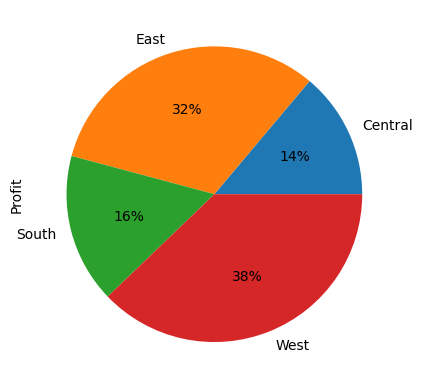

In [31]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='Segment'>

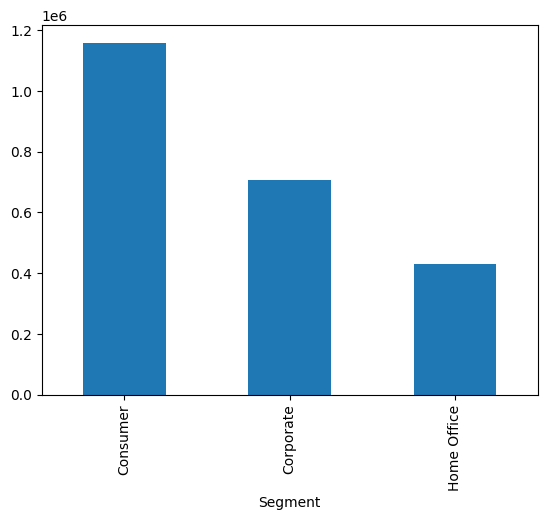

In [32]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<Axes: xlabel='Segment'>

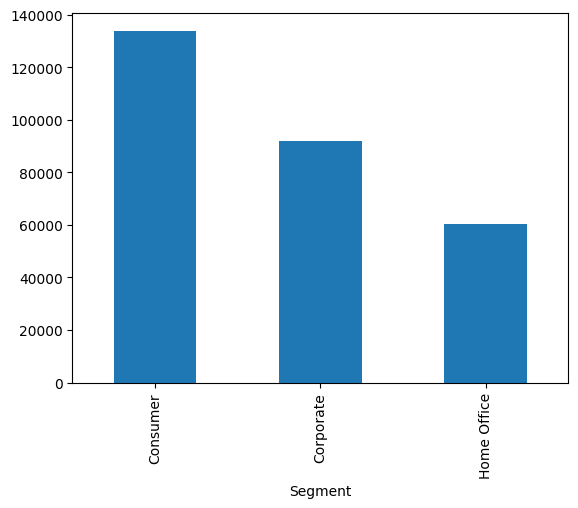

In [33]:
df.groupby("Segment")["Profit"].sum().plot.bar()

<Axes: xlabel='Category'>

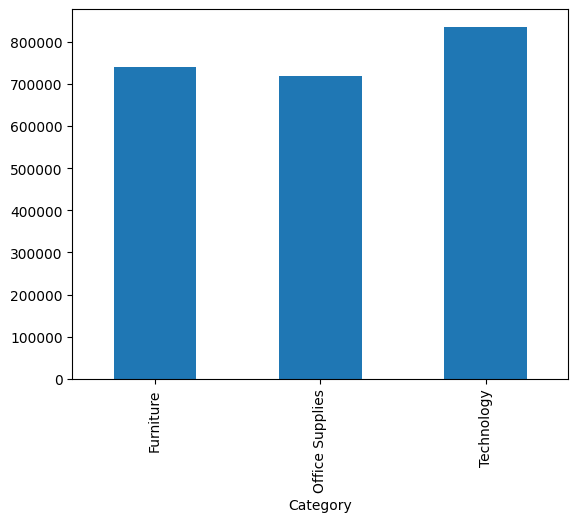

In [34]:
df.groupby("Category")["Sales"].sum().plot.bar()

<Axes: xlabel='Category'>

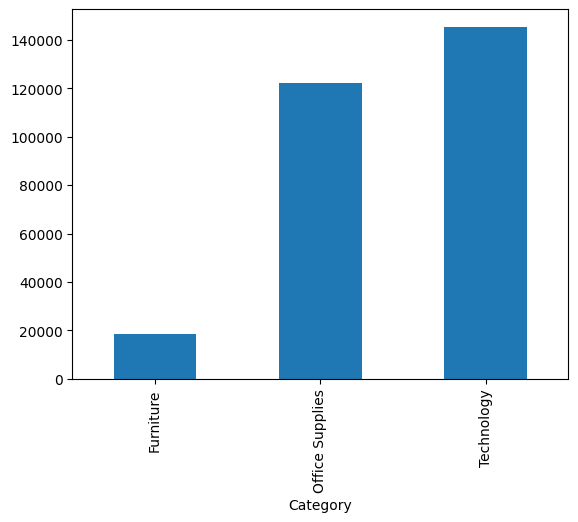

In [35]:
df.groupby("Category")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

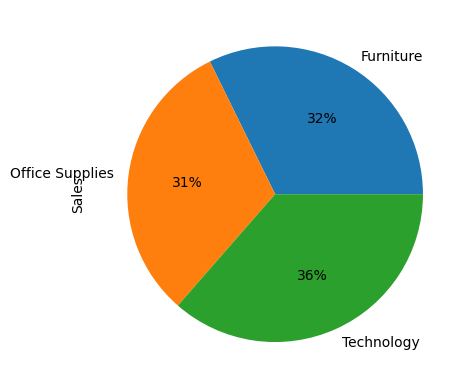

In [36]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

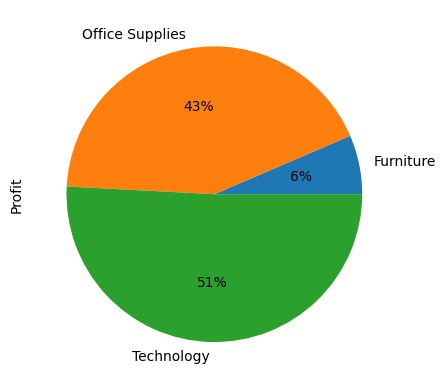

In [37]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='State'>

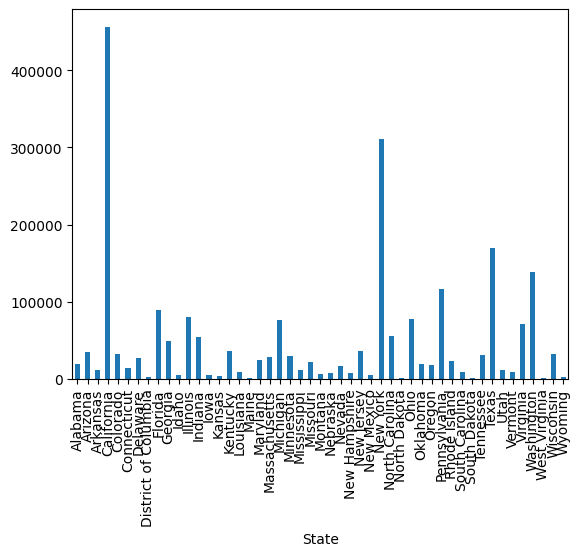

In [38]:
df.groupby("State")["Sales"].sum().plot.bar()


<Axes: xlabel='State'>

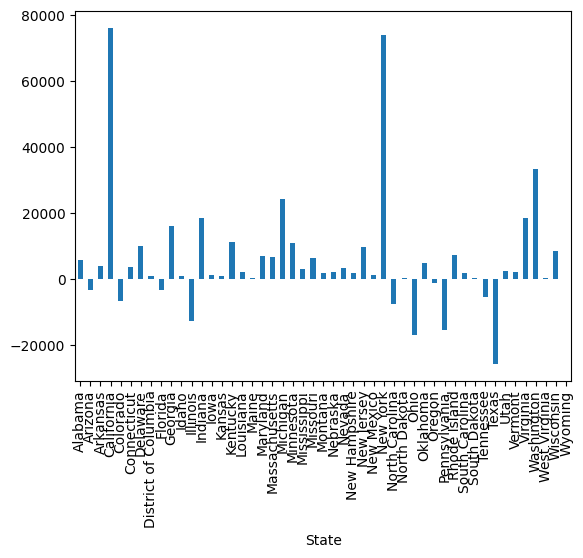

In [39]:
df.groupby("State")["Profit"].sum().plot.bar()

<Axes: ylabel='Category'>

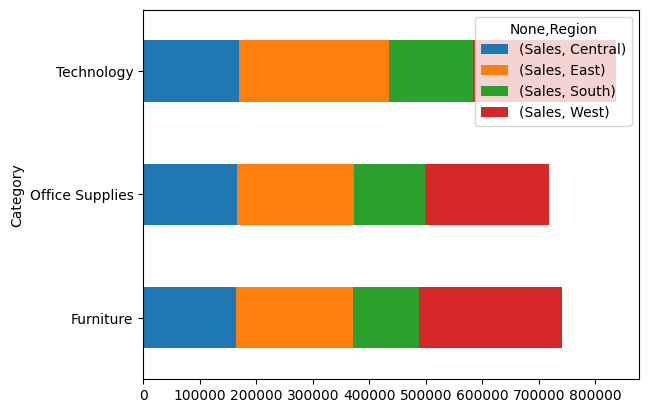

In [40]:
stacked_data = pd.pivot_table(df,index=['Category'],columns=['Region'],values=['Sales'],aggfunc='sum')
stacked_data.plot.barh(stacked='True')

In [41]:
segment_analysis=pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())

<Axes: xlabel='Segment'>

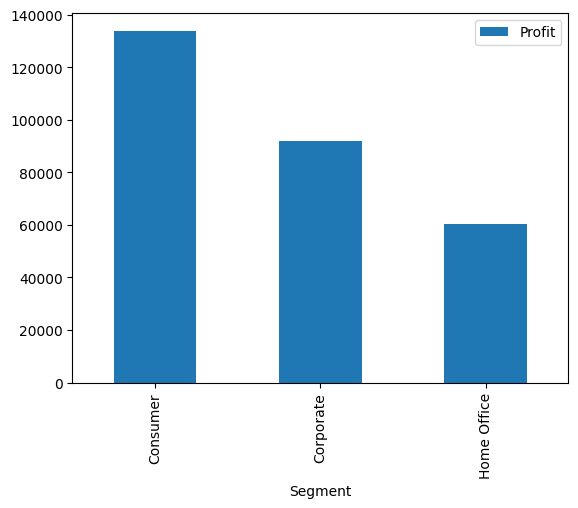

In [42]:
segment_analysis.plot.bar()